<a href="https://colab.research.google.com/github/viddev1/tensorflow_notebooks/blob/main/notebooks/tf_cnn_cv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [3]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-05-23 23:28:34--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.128, 142.250.4.128, 142.251.12.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  93.4MB/s    in 1.1s    

2022-05-23 23:28:36 (93.4 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [4]:
!ls pizza_steak

test  train


In [5]:
!ls pizza_steak/train/

pizza  steak


In [6]:
!ls pizza_steak/train/steak/

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [7]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [8]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train


750

In [9]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class
  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder+ "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")

  return img

Image shape: (384, 512, 3)


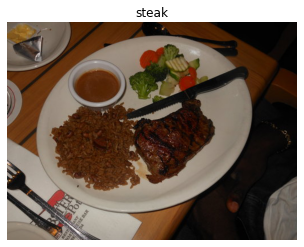

In [11]:
img = view_random_image(target_dir="pizza_steak/train/", target_class="steak")

In [12]:
img, img.shape

(array([[[ 92,  75,  59],
         [ 96,  78,  64],
         [101,  83,  69],
         ...,
         [ 11,   7,   6],
         [ 11,   7,   6],
         [ 11,   7,   6]],
 
        [[101,  85,  70],
         [104,  88,  73],
         [107,  91,  76],
         ...,
         [ 11,   7,   6],
         [ 11,   7,   6],
         [ 11,   7,   6]],
 
        [[105,  92,  76],
         [106,  93,  77],
         [108,  95,  79],
         ...,
         [ 11,   7,   6],
         [ 11,   7,   6],
         [ 11,   7,   6]],
 
        ...,
 
        [[135, 119, 104],
         [135, 119, 104],
         [135, 119, 104],
         ...,
         [ 99,  90,  81],
         [ 98,  89,  80],
         [ 97,  88,  79]],
 
        [[135, 119, 104],
         [135, 119, 104],
         [135, 119, 104],
         ...,
         [ 99,  89,  80],
         [ 99,  89,  80],
         [ 99,  89,  80]],
 
        [[135, 119, 104],
         [135, 119, 104],
         [135, 119, 104],
         ...,
         [ 99,  89,  79],
  

In [13]:
img/255

array([[[0.36078431, 0.29411765, 0.23137255],
        [0.37647059, 0.30588235, 0.25098039],
        [0.39607843, 0.3254902 , 0.27058824],
        ...,
        [0.04313725, 0.02745098, 0.02352941],
        [0.04313725, 0.02745098, 0.02352941],
        [0.04313725, 0.02745098, 0.02352941]],

       [[0.39607843, 0.33333333, 0.2745098 ],
        [0.40784314, 0.34509804, 0.28627451],
        [0.41960784, 0.35686275, 0.29803922],
        ...,
        [0.04313725, 0.02745098, 0.02352941],
        [0.04313725, 0.02745098, 0.02352941],
        [0.04313725, 0.02745098, 0.02352941]],

       [[0.41176471, 0.36078431, 0.29803922],
        [0.41568627, 0.36470588, 0.30196078],
        [0.42352941, 0.37254902, 0.30980392],
        ...,
        [0.04313725, 0.02745098, 0.02352941],
        [0.04313725, 0.02745098, 0.02352941],
        [0.04313725, 0.02745098, 0.02352941]],

       ...,

       [[0.52941176, 0.46666667, 0.40784314],
        [0.52941176, 0.46666667, 0.40784314],
        [0.52941176, 0

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1.00/255)
valid_datagen = ImageDataGenerator(rescale=1.00/255)

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42
                                               )

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42
                                               )
model_1 = tf.keras.models.Sequential([
                                      tf.keras.layers.Conv2D(filters=10,
                                                             kernel_size=3,
                                                             activation='relu',
                                                             input_shape=(224, 224, 3)),
                                      tf.keras.layers.Conv2D(10, 3, activation='relu'),
                                      tf.keras.layers.MaxPool2D(pool_size=2,
                                                                padding="valid"),
                                      tf.keras.layers.Conv2D(10, 3, activation='relu'),
                                      tf.keras.layers.Conv2D(10, 3, activation='relu'),
                                      tf.keras.layers.MaxPool2D(2),
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(1, activation='sigmoid')
])


model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data)
                        )

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 23s 208ms/step - loss: 0.5855 - accuracy: 0.6593 - val_loss: 0.3841 - val_accuracy: 0.8280
Epoch 2/5
47/47 [==============================] - 9s 193ms/step - loss: 0.4203 - accuracy: 0.8047 - val_loss: 0.3555 - val_accuracy: 0.8520
Epoch 3/5
47/47 [==============================] - 9s 191ms/step - loss: 0.3989 - accuracy: 0.8260 - val_loss: 0.3690 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 9s 193ms/step - loss: 0.3437 - accuracy: 0.8647 - val_loss: 0.3057 - val_accuracy: 0.8820
Epoch 5/5
47/47 [==============================] - 10s 204ms/step - loss: 0.3016 - accuracy: 0.8793 - val_loss: 0.2852 - val_accuracy: 0.8840


In [15]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

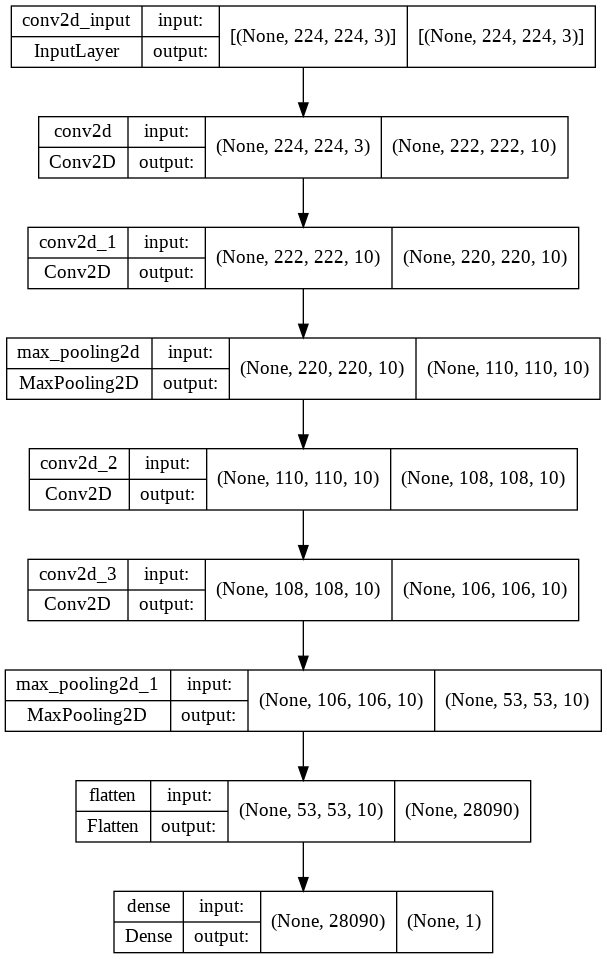

In [16]:
from tensorflow.keras.utils import plot_model
plot_model(model_1, show_shapes=True)

In [17]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy']
                )

history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data)
                        )

Epoch 1/5
47/47 [==============================] - 9s 180ms/step - loss: 1.5793 - accuracy: 0.4947 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 175ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 175ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 176ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 184ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [18]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [19]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
                               tf.keras.layers.Dense(100, activation='relu'),
                               tf.keras.layers.Dense(100, activation='relu'),
                               tf.keras.layers.Dense(100, activation='relu'),
                               tf.keras.layers.Dense(1, activation='sigmoid')
])

model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy']
                )

history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data)
                        )

Epoch 1/5
47/47 [==============================] - 9s 180ms/step - loss: 2.7973 - accuracy: 0.6613 - val_loss: 0.5262 - val_accuracy: 0.7780
Epoch 2/5
47/47 [==============================] - 8s 175ms/step - loss: 0.7066 - accuracy: 0.7213 - val_loss: 1.3700 - val_accuracy: 0.6060
Epoch 3/5
47/47 [==============================] - 8s 177ms/step - loss: 0.7956 - accuracy: 0.7187 - val_loss: 0.5550 - val_accuracy: 0.7340
Epoch 4/5
47/47 [==============================] - 8s 176ms/step - loss: 0.4879 - accuracy: 0.7820 - val_loss: 0.4492 - val_accuracy: 0.7740
Epoch 5/5
47/47 [==============================] - 8s 177ms/step - loss: 0.6570 - accuracy: 0.7527 - val_loss: 1.1242 - val_accuracy: 0.6520


In [20]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


Image shape: (288, 512, 3)
Image shape: (512, 384, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


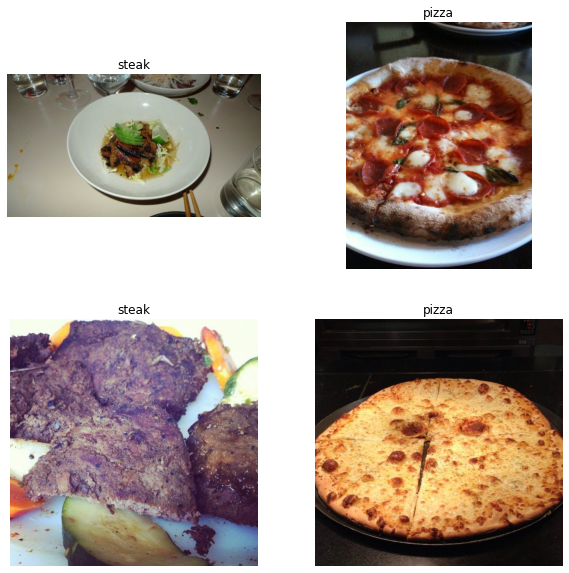

In [21]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(2,2,2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")
plt.subplot(2,2,3)
steak_img_test = view_random_image("pizza_steak/test/", "steak")
plt.subplot(2,2,4)
pizza_img_test = view_random_image("pizza_steak/test/", "pizza")

In [22]:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

In [24]:
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32
                                               )

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32
                                             )

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [25]:
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [27]:
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [28]:
labels, labels.shape

(array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
        1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
       dtype=float32), (32,))

In [29]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [30]:
model_4 = Sequential([
                      Conv2D(
                          filters=10,
                          kernel_size=3,
                          strides=1,
                          padding='valid',
                          activation='relu',
                          input_shape=(224, 224, 3)
                      ),
                      Conv2D(10, 3, activation='relu'),
                      Conv2D(10, 3, activation='relu'),
                      Flatten(),
                      Dense(1, activation='sigmoid')
])

In [31]:
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [32]:
len(train_data), len(test_data)

(47, 16)

In [34]:
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data)
                        )

Epoch 1/5
47/47 [==============================] - 12s 247ms/step - loss: 1.4374 - accuracy: 0.5567 - val_loss: 0.6700 - val_accuracy: 0.5200
Epoch 2/5
47/47 [==============================] - 17s 352ms/step - loss: 0.5553 - accuracy: 0.7127 - val_loss: 0.4372 - val_accuracy: 0.7980
Epoch 3/5
47/47 [==============================] - 9s 192ms/step - loss: 0.4050 - accuracy: 0.8353 - val_loss: 0.4140 - val_accuracy: 0.8120
Epoch 4/5
47/47 [==============================] - 9s 194ms/step - loss: 0.2771 - accuracy: 0.8813 - val_loss: 0.4258 - val_accuracy: 0.8120
Epoch 5/5
47/47 [==============================] - 9s 192ms/step - loss: 0.1252 - accuracy: 0.9613 - val_loss: 0.4601 - val_accuracy: 0.7940


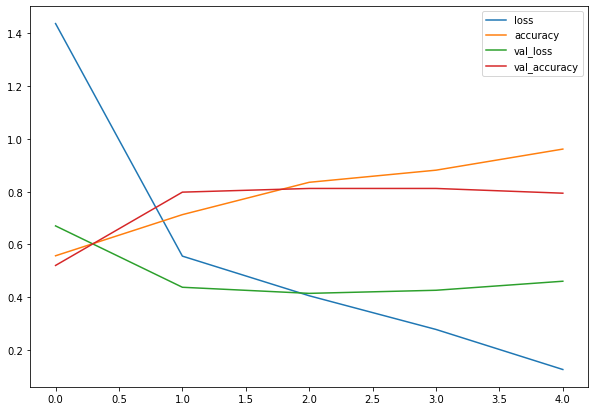

In [35]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7))

In [38]:
def plot_loss_curves(history):
  loss=history.history['loss']
  val_loss=history.history['val_loss']

  accuracy=history.history['accuracy']
  val_accuracy=history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  plt.plot(epochs, loss, label='training loss')
  plt.plot(epochs, val_loss, label='validation loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label='training accuracy')
  plt.plot(epochs, val_accuracy, label='validation accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

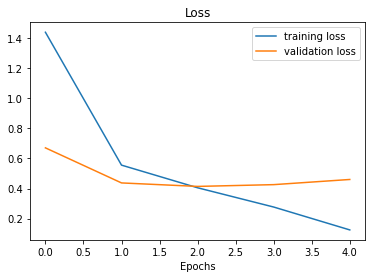

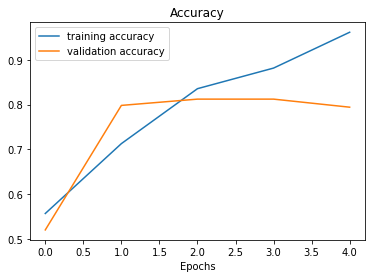

In [39]:
plot_loss_curves(history_4)

In [40]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [41]:
model_5 = Sequential([
                      Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
                      MaxPool2D(pool_size=2),
                      Conv2D(10, 3, activation='relu'),
                      MaxPool2D(),
                      Conv2D(10, 3, activation='relu'),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation='sigmoid')
])

In [42]:
model_5.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [43]:
history_5 = model_5.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 192ms/step - loss: 0.6574 - accuracy: 0.6013 - val_loss: 0.5060 - val_accuracy: 0.7660
Epoch 2/5
47/47 [==============================] - 9s 184ms/step - loss: 0.4566 - accuracy: 0.7887 - val_loss: 0.3789 - val_accuracy: 0.8540
Epoch 3/5
47/47 [==============================] - 10s 211ms/step - loss: 0.4091 - accuracy: 0.8180 - val_loss: 0.3629 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 10s 210ms/step - loss: 0.3969 - accuracy: 0.8253 - val_loss: 0.3306 - val_accuracy: 0.8740
Epoch 5/5
47/47 [==============================] - 13s 280ms/step - loss: 0.3636 - accuracy: 0.8413 - val_loss: 0.3118 - val_accuracy: 0.8740


In [44]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

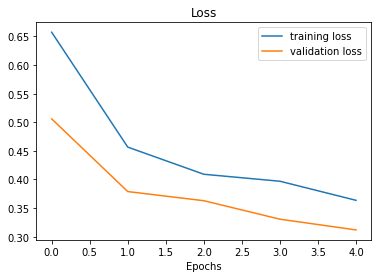

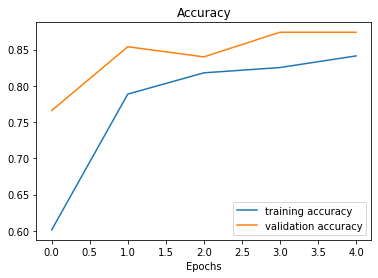

In [45]:
plot_loss_curves(history_5)

In [46]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.0,
                                             rotation_range=20,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

train_datagen = ImageDataGenerator(rescale=1/255.0)
test_datagen = ImageDataGenerator(rescale=1/255.0)

In [47]:
print("Augmented training Images:")
train_data_aug = train_datagen_augmented.flow_from_directory(train_dir,
                                                             target_size=(224,224),
                                                             batch_size=32,
                                                             class_mode='binary',
                                                             shuffle=False)

print("Non Augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)

print("Unchanged Test Images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary'
                                             )

Augmented training Images:
Found 1500 images belonging to 2 classes.
Non Augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged Test Images:
Found 500 images belonging to 2 classes.


In [48]:
images, labels = train_data.next()
aug_images, aug_labels = train_data_aug.next()

(-0.5, 223.5, 223.5, -0.5)

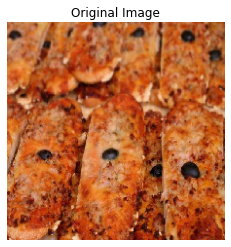

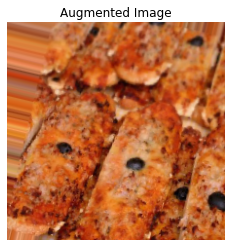

In [51]:
random_number = random.randint(0, 32)
plt.imshow(images[random_number])
plt.title(f"Original Image")
plt.axis(False)
plt.figure()
plt.imshow(aug_images[random_number])
plt.title(f"Augmented Image")
plt.axis(False)

In [52]:
model_6 = Sequential([
                      Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
                      MaxPool2D(pool_size=2),
                      Conv2D(10, 3, activation='relu'),
                      MaxPool2D(),
                      Conv2D(10, 3, activation='relu'),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation='sigmoid')
])

model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_6 = model_6.fit(train_data_aug, 
                        epochs=5,
                        steps_per_epoch=len(train_data_aug),
                        validation_data=test_data,
                        validation_steps=len(test_data)
                        )

Epoch 1/5
47/47 [==============================] - 22s 462ms/step - loss: 0.7263 - accuracy: 0.4100 - val_loss: 0.6883 - val_accuracy: 0.5440
Epoch 2/5
47/47 [==============================] - 27s 574ms/step - loss: 0.6913 - accuracy: 0.4987 - val_loss: 0.6865 - val_accuracy: 0.6780
Epoch 3/5
47/47 [==============================] - 23s 487ms/step - loss: 0.7036 - accuracy: 0.5553 - val_loss: 0.6783 - val_accuracy: 0.7760
Epoch 4/5
47/47 [==============================] - 28s 587ms/step - loss: 0.6865 - accuracy: 0.5793 - val_loss: 0.6574 - val_accuracy: 0.5540
Epoch 5/5
47/47 [==============================] - 37s 790ms/step - loss: 0.6757 - accuracy: 0.6033 - val_loss: 0.6275 - val_accuracy: 0.8000


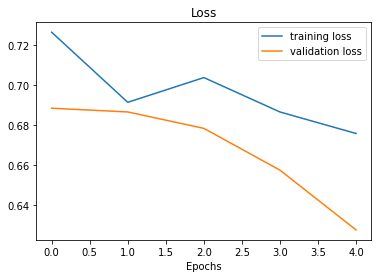

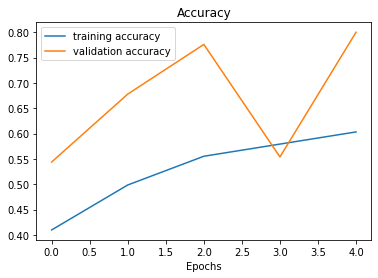

In [53]:
plot_loss_curves(history_6)

In [55]:
train_data_aug_shuf = train_datagen_augmented.flow_from_directory(train_dir,
                                                            target_size=(224, 224),
                                                            batch_size=32,
                                                            class_mode='binary',
                                                            shuffle=True)

Found 1500 images belonging to 2 classes.


In [57]:
model_7 = Sequential([
                      Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
                      MaxPool2D(pool_size=2),
                      Conv2D(10, 3, activation='relu'),
                      MaxPool2D(),
                      Conv2D(10, 3, activation='relu'),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation='sigmoid')                      
])

model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_7= model_7.fit(train_data_aug_shuf,
              epochs=5,
              steps_per_epoch=len(train_data_aug_shuf),
              validation_data=test_data,
              validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 26s 551ms/step - loss: 0.6522 - accuracy: 0.6120 - val_loss: 0.4811 - val_accuracy: 0.8100
Epoch 2/5
47/47 [==============================] - 21s 455ms/step - loss: 0.5492 - accuracy: 0.7280 - val_loss: 0.4140 - val_accuracy: 0.8400
Epoch 3/5
47/47 [==============================] - 22s 458ms/step - loss: 0.5030 - accuracy: 0.7560 - val_loss: 0.3739 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 22s 477ms/step - loss: 0.4879 - accuracy: 0.7733 - val_loss: 0.3579 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 22s 460ms/step - loss: 0.4505 - accuracy: 0.8067 - val_loss: 0.3312 - val_accuracy: 0.8580


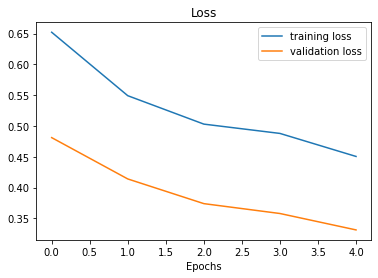

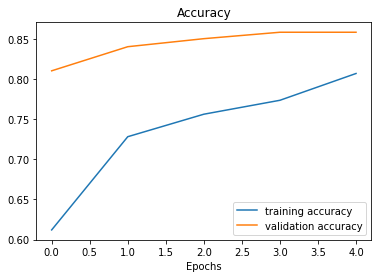

In [58]:
plot_loss_curves(history_7)

In [59]:
# Create a CNN model (same as Tiny VGG but for binary classification - https://poloclub.github.io/cnn-explainer/ )
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), # same input shape as our images
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_aug_shuf,
                        epochs=5,
                        steps_per_epoch=len(train_data_aug_shuf),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 27s 553ms/step - loss: 0.6917 - accuracy: 0.5287 - val_loss: 0.6225 - val_accuracy: 0.7560
Epoch 2/5
47/47 [==============================] - 22s 469ms/step - loss: 0.6110 - accuracy: 0.6833 - val_loss: 0.4790 - val_accuracy: 0.8200
Epoch 3/5
47/47 [==============================] - 25s 528ms/step - loss: 0.5355 - accuracy: 0.7600 - val_loss: 0.4154 - val_accuracy: 0.8260
Epoch 4/5
47/47 [==============================] - 24s 501ms/step - loss: 0.5234 - accuracy: 0.7520 - val_loss: 0.3980 - val_accuracy: 0.8260
Epoch 5/5
47/47 [==============================] - 24s 519ms/step - loss: 0.5021 - accuracy: 0.7780 - val_loss: 0.3906 - val_accuracy: 0.8520


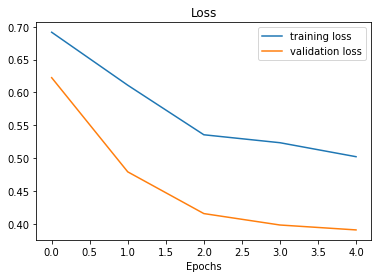

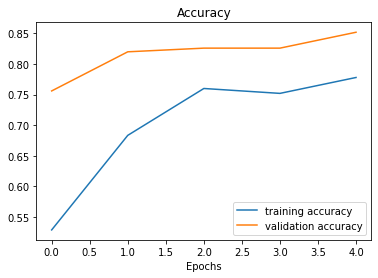

In [60]:
plot_loss_curves(history_8)

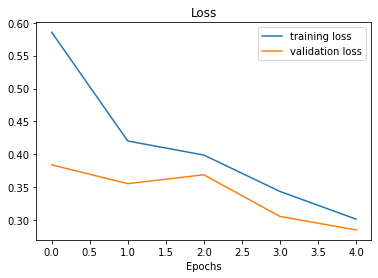

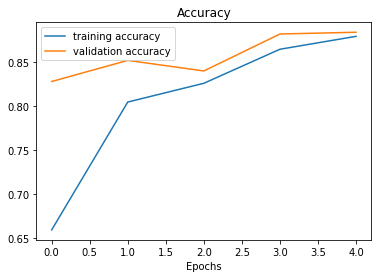

In [63]:
plot_loss_curves(history_1)

In [61]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [62]:
model_8.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_20 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_22 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

In [64]:
print(class_names)

['pizza' 'steak']


--2022-05-24 03:06:38--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.009s  

2022-05-24 03:06:38 (222 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



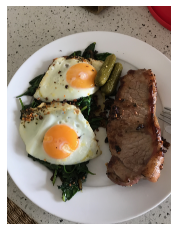

In [65]:
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [70]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [72]:
steak = load_and_prep_image('03-steak.jpeg')
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [78]:
print(steak.shape)
steak = tf.expand_dims(steak, axis=0)
print(steak.shape)

(224, 224, 3)
(1, 224, 224, 3)


In [81]:
pred = model_8.predict(steak)
pred

array([[0.7773074]], dtype=float32)

In [80]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [83]:
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'steak'

In [84]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

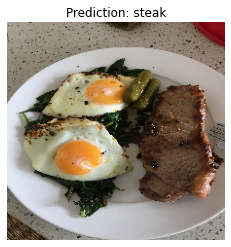

In [85]:
pred_and_plot(model_8, "03-steak.jpeg", class_names)

--2022-05-24 03:49:52--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.02s   

2022-05-24 03:49:53 (145 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



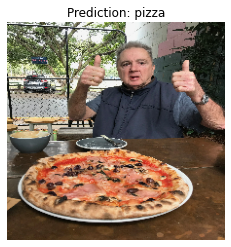

In [86]:
# Download another test image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg 
pred_and_plot(model_8, "03-pizza-dad.jpeg", class_names)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import inspect
print(dir(ImageDataGenerator))
print(inspect.getsource(ImageDataGenerator.flow_from_directory))